In [4]:
from pymongo import MongoClient
import pprint
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import geograpy
%matplotlib inline
import pickle

In [7]:
MONGODB_HOST = 'localhost'
MONGODB_PORT = 27017
DBS_NAME = 'KSCHOOL_TFM'
COLLECTION_NAME = 'tweets'

connection = MongoClient(MONGODB_HOST, MONGODB_PORT) #getting client
db_tweets = connection[DBS_NAME][COLLECTION_NAME] #getting db

# How many users share their location?

## Users with geo tag enabled on tweet

In [124]:
total_tweets = collection.find().count()
geo_tweets = collection.find({"geo":{"$ne":None}}).count()
r = float(geo_tweets)/float(total_tweets)
print("{:.2f}% tweets have geo tag enabled".format(100*r))

0.81% tweets have geo tag enabled


# Users whose location field points to a country

In [134]:
total_tweets = collection.find().count()
geo_tweets = collection.find({"user.location":{"$ne":''}}).count()
r = float(geo_tweets)/float(total_tweets)
print("{:.2f}% of users have a nonempty location field".format(100*r))

69.62% of users have a nonempty location field


In [18]:
locations_tweets = collection.find({"user.location":{"$ne":''}}).distinct('user.location')

Using geotext, 8.41% of users' location field points to a country


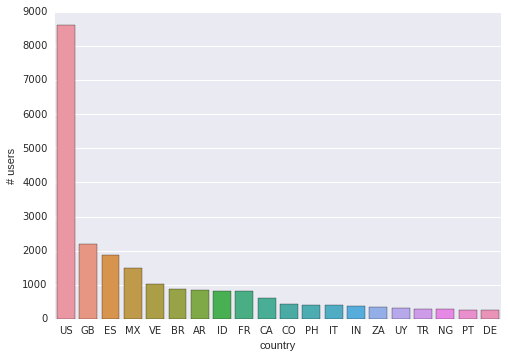

In [132]:
countries=map(lambda x: x[0], filter(lambda x: x, map(lambda x: geotext.GeoText(x.title()).country_mentions.keys(), locations_tweets) ))
countries_count=dict([ [country,0] for country in  set(countries)])
for country in countries:
    countries_count[country]+=1

geo_tweets = reduce(lambda x,y : x+y, countries_count.values())
r = float(geo_tweets)/float(total_tweets)
print("Using geotext, {:.2f}% of users' location field points to a country".format(100*r))

countries_count=pd.DataFrame(countries_count.values(), index=countries_count.keys())
countries_count = countries_count.sort_values(by=0,ascending=False)
sns.barplot(countries_count.index.values[:20], countries_count[0][:20])
plt.ylabel('# users')
plt.xlabel('country')
plt.show()

In [26]:
location = geolocator.geocode("maracaibo", exactly_one=False)
map(lambda x: x.address, location)

[u'Maracaibo, La veguita, Pinto Salinas, Parroquia El Recreo, Municipio Libertador, Distrito Capital, Regi\xf3n Capital, 1050, Venezuela',
 u'Maracaibo, Quebrada Honda, Pinto Salinas, Parroquia El Recreo, Municipio Libertador, Distrito Capital, Regi\xf3n Capital, 1050, Venezuela',
 u'Maracaibo, Via Carlo Zeno, Jesolo, VE, VEN, 30017, Italia',
 u'Maracaibo, Autopista: Cimarr\xf3n Andresote, Tricentenario, Distrito Nirgua, Yaracuy, Venezuela',
 u'Maracaibo, Av. 2 Lora, Parroquia El Llano, Municipio Libertador, M\xe9rida, 5101, Venezuela',
 u'Maracaibo, Av. Casanova, Chacaito, Pinto Salinas, Parroquia El Recreo, Municipio Libertador, Distrito Capital, Regi\xf3n Capital, 1050, Venezuela']

In [40]:
total_tweets = collection.find().count()
geo_tweets = collection.find({"user.geo_enabled":True}).count()
r = float(geo_tweets)/float(total_tweets)
print("{:.2f}% tweets have geo tag enabled".format(100*r))

47.12% tweets have geo tag enabled


# Own rutines

In [19]:
geonameid_info_dict = pickle.load(open('../geonames/geonameid_info_dict.p'))
name_geonameidLIST_dict = pickle.load(open('../geonames/name_geonameidLIST_dict.p'))
asciiname_geonameidLIST_dict = pickle.load(open('../geonames/asciiname_geonameidLIST_dict.p'))
altnames_geonameidLIST_dict = pickle.load(open('../geonames/altnames_geonameidLIST_dict.p'))

In [8]:
locations_tweets = db_tweets.find({"user.location":{"$ne":''}}).distinct('user.location')

In [9]:
n_unique_locations = len(locations_tweets)
print n_unique_locations

188455


In [35]:
locations = map(lambda x: x.lower(), locations_tweets)
locations = locations[:10000]

In [68]:
import pprint
k=u'peralvillo'
k=u'costa rica'
if k in altnames_geonameidLIST_dict:
    geoids = altnames_geonameidLIST_dict[k]
    for geoid in geoids:
        pprint.pprint(geonameid_info_dict[geoid])

{'admin1 code': u'25',
 'admin2 code': u'006',
 'alternatenames': [u'Costa Rica',
                    u'Kosta-Rika',
                    u'Villa de Costa Rica',
                    u'\u041a\u043e\u0441\u0442\u0430-\u0420\u0438\u043a\u0430'],
 'asciiname': u'Villa de Costa Rica',
 'country code': u'MX',
 'dem': 31,
 'feature class': u'P',
 'feature code': u'PPL',
 'latitude': 24.59167,
 'longitude': -107.38836,
 'modification date': datetime.datetime(2015, 6, 22, 0, 0),
 'name': u'Villa de Costa Rica',
 'population': 21662,
 'timezone': u'America/Mazatlan'}
{'admin1 code': u'00',
 'alternatenames': [u'Costa Rica',
                    u'Costa Rice',
                    u'Cot-xta Ri-ca',
                    u'C\xf2sta Rica',
                    u'C\xf3sta R\xedce',
                    u'C\u1ed1t-xta Ri-ca',
                    u'Khosta Rikha',
                    u'Kosita Lika',
                    u'Kosita Rika',
                    u'Kositarika',
                    u'Kosta Riika',
    

In [72]:
u'costa rica'.split(',')[0]

u'costa rica'

In [82]:
locations_ids = []
for location in locations:
    
    l1=location.strip().split(',')[0]
    l2=location.strip().split(' ')[0]
    l3=location.strip().split(' ')[-1]        
    l4=location.strip().split(',')[-1]        
    l5=location.strip().split('/')[0]        
    l6=location.strip().split('/')[-1]        
    l7=location.strip().split('.')[0]        
    l8=location.strip().split('.')[-1]        
    l9=location.strip().split('-')[0]        
    l10=location.strip().split('-')[-1]        

    if l1 in name_geonameidLIST_dict: locations_ids.append(1)
    elif l1 in altnames_geonameidLIST_dict: locations_ids.append(2)
    elif unicodedata.normalize('NFD', l1).encode('ASCII', 'ignore') in asciiname_geonameidLIST_dict: 
        locations_ids.append(3)

    elif l2 in name_geonameidLIST_dict: locations_ids.append(4)
    elif l2 in altnames_geonameidLIST_dict: locations_ids.append(5)
    elif unicodedata.normalize('NFD', l2).encode('ASCII', 'ignore') in asciiname_geonameidLIST_dict: 
        locations_ids.append(6)

    elif l3 in name_geonameidLIST_dict: locations_ids.append(7)
    elif l3 in altnames_geonameidLIST_dict: locations_ids.append(8)
    elif unicodedata.normalize('NFD', l3).encode('ASCII', 'ignore') in asciiname_geonameidLIST_dict: 
        locations_ids.append(9)

    elif l4 in name_geonameidLIST_dict: locations_ids.append(10)
    elif l4 in altnames_geonameidLIST_dict: locations_ids.append(11)
    elif unicodedata.normalize('NFD', l4).encode('ASCII', 'ignore') in asciiname_geonameidLIST_dict: 
        locations_ids.append(12)

    elif l5 in name_geonameidLIST_dict: locations_ids.append(13)
    elif l5 in altnames_geonameidLIST_dict: locations_ids.append(14)
    elif unicodedata.normalize('NFD', l5).encode('ASCII', 'ignore') in asciiname_geonameidLIST_dict: 
        locations_ids.append(15)

    elif l6 in name_geonameidLIST_dict: locations_ids.append(16)
    elif l6 in altnames_geonameidLIST_dict: locations_ids.append(16)
    elif unicodedata.normalize('NFD', l6).encode('ASCII', 'ignore') in asciiname_geonameidLIST_dict: 
        locations_ids.append(16)

    elif l7 in name_geonameidLIST_dict: locations_ids.append(17)
    elif l7 in altnames_geonameidLIST_dict: locations_ids.append(17)
    elif unicodedata.normalize('NFD', l7).encode('ASCII', 'ignore') in asciiname_geonameidLIST_dict: 
        locations_ids.append(17)

    elif l8 in name_geonameidLIST_dict: locations_ids.append(18)
    elif l8 in altnames_geonameidLIST_dict: locations_ids.append(18)
    elif unicodedata.normalize('NFD', l8).encode('ASCII', 'ignore') in asciiname_geonameidLIST_dict: 
        locations_ids.append(18)

    elif l9 in name_geonameidLIST_dict: locations_ids.append(19)
    elif l9 in altnames_geonameidLIST_dict: locations_ids.append(20)
    elif unicodedata.normalize('NFD', l9).encode('ASCII', 'ignore') in asciiname_geonameidLIST_dict: 
        locations_ids.append(21)

    else: locations_ids.append(False)

In [83]:
print (np.array(locations_ids)==1).sum()
print (np.array(locations_ids)==2).sum()
print (np.array(locations_ids)==3).sum()
print (np.array(locations_ids)==4).sum()
print (np.array(locations_ids)==5).sum()
print (np.array(locations_ids)==6).sum()
print (np.array(locations_ids)==7).sum()
print (np.array(locations_ids)==8).sum()
print (np.array(locations_ids)==9).sum()
print (np.array(locations_ids)==10).sum()
print (np.array(locations_ids)==11).sum()
print (np.array(locations_ids)==12).sum()
print (np.array(locations_ids)==13).sum()
print (np.array(locations_ids)==14).sum()
print (np.array(locations_ids)==15).sum()
print (np.array(locations_ids)==16).sum()
print (np.array(locations_ids)==17).sum()
print (np.array(locations_ids)==18).sum()
print (np.array(locations_ids)==19).sum()
print (np.array(locations_ids)==20).sum()
print (np.array(locations_ids)==21).sum()
print (np.array(locations_ids)==False).sum()

3523
701
5
877
876
7
453
576
9
4
25
0
121
33
0
16
83
43
38
27
0
2583


In [76]:
locations_tweets[153].strip()

u'Costa Rica'

In [28]:
import unicodedata


In [84]:
for i, v in enumerate(locations_ids):
    if v==False: print i, locations_tweets[i]

7 Northside478
8 grind
9 Arkham
31 heartbreak hotel
33 Wonderland
36 Slytherin Common Room
42 Happy Sunny Life 
43 DTX
46 beebe
56 KansasCity/LeesSummit
57   NYC S.I #26 - KIDULT
74 Vagabond Tales
78  my girl
82 outdoorsy
84 dumpster
102 480 
103 Gazorpazorp 
109 ćÄGêd ĄņĪM@L
113 New Yorkkk
116 SC: Big.Mac25
121 tobie town
123 instagram/bay_self
130 9️⃣0️⃣3️⃣
134 BamaBorn, NCBred, CLT-PHL-MPLS
135 sunny s.d
136 idk 
137 #blacklivesmatter
140 iPhone: 30.230698,-97.842825
146 ☕☺✌️
148 KD❤️
160 Agua Prieta Sonora Mex. 
161 ÜT: 18.4449564,-69.9732575
173 Puerta de Oro, Valle de Abajo
177 ♌ Aquí, creyendo lo imposible.
189 Bavaro Punta Cana /Rep. Dom.
191 En el kokoro de Viry v: uwu
206 Inside the beltway
210 ML410.W33 
219 Twin Cities 
221 TC
230 plu
234 POZA RICA VER.
236 Carr, Don Antonio GUzman
242 DMV
251 socal
253 UW-Whitewater 
255 somewhere else
278 Nawfside
281 sjb
283 Bmore
285 202 / 910
288 919!
289 Link Loop Land
294 somewhere with my baby
311 w jasmine
325 Free States 
333 Bus